# Absenteeism at Work - A Clustering Project

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [49]:
df = pd.read_csv('Absenteeism_at_work.csv', delimiter=";")

In [50]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


### Exploratory Data Analysis (EDA)

In [51]:
df.shape

(740, 21)

In [52]:
df.isnull().sum(axis=0)

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [53]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [54]:
df.drop(['ID','Absenteeism time in hours'], axis =1, inplace = True)

In [55]:
df.shape

(740, 19)

In [56]:
X = df.values

In [57]:
X

array([[ 26.,   7.,   3., ...,  90., 172.,  30.],
       [  0.,   7.,   3., ...,  98., 178.,  31.],
       [ 23.,   7.,   4., ...,  89., 170.,  31.],
       ...,
       [  0.,   0.,   3., ...,  98., 170.,  34.],
       [  0.,   0.,   4., ..., 100., 170.,  35.],
       [  0.,   0.,   6., ...,  77., 175.,  25.]])

### Import of Clustering Libraries from Scipy

In [58]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

In [59]:
distance = linkage(X, 'ward')

### Display of Hierarchical Clustering Dendrogram

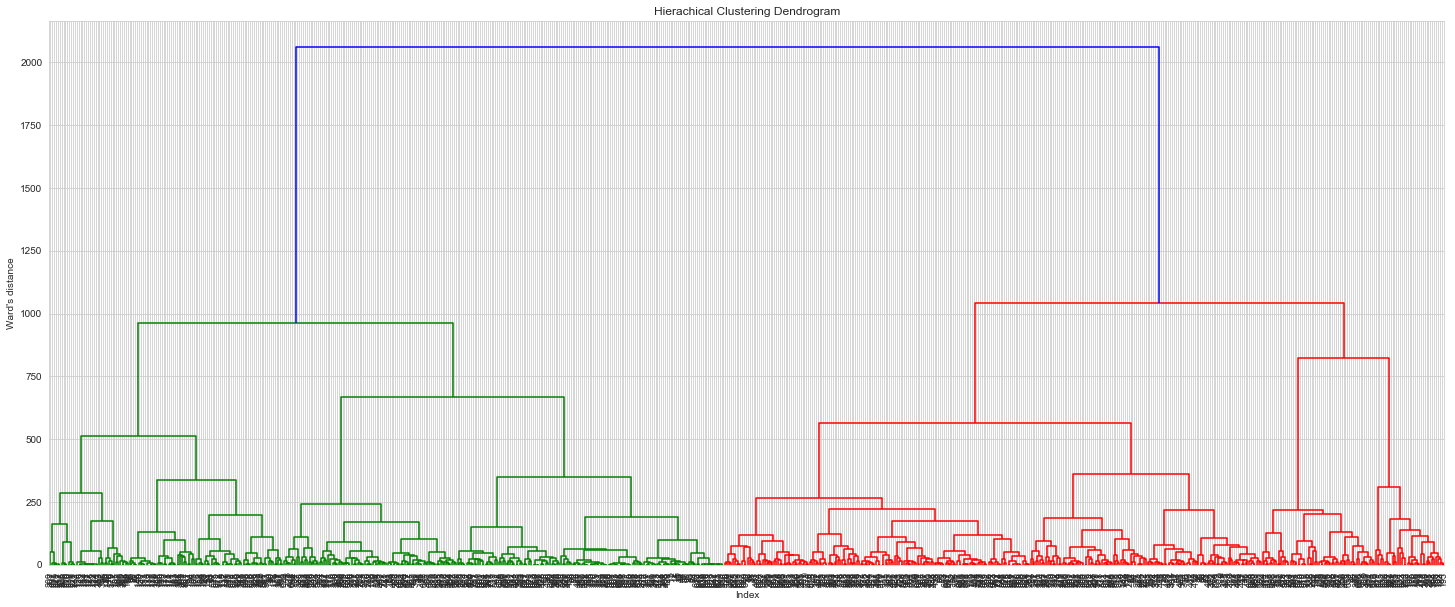

In [60]:
plt.figure(figsize=(25, 10))
plt.title('Hierachical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(distance, 
          leaf_rotation=90.,
          leaf_font_size=9.,);

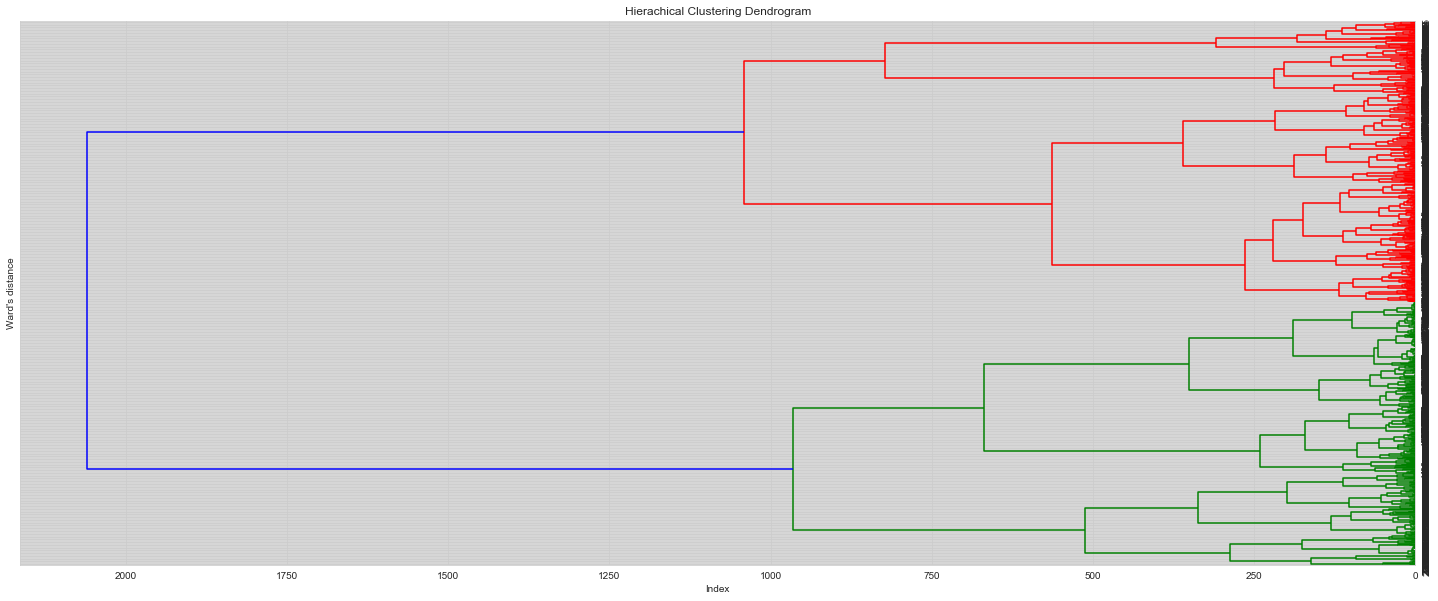

In [61]:
plt.figure(figsize=(25, 10))
plt.title('Hierachical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(distance, orientation ='left',
          leaf_rotation=90.,
          leaf_font_size=9.,);

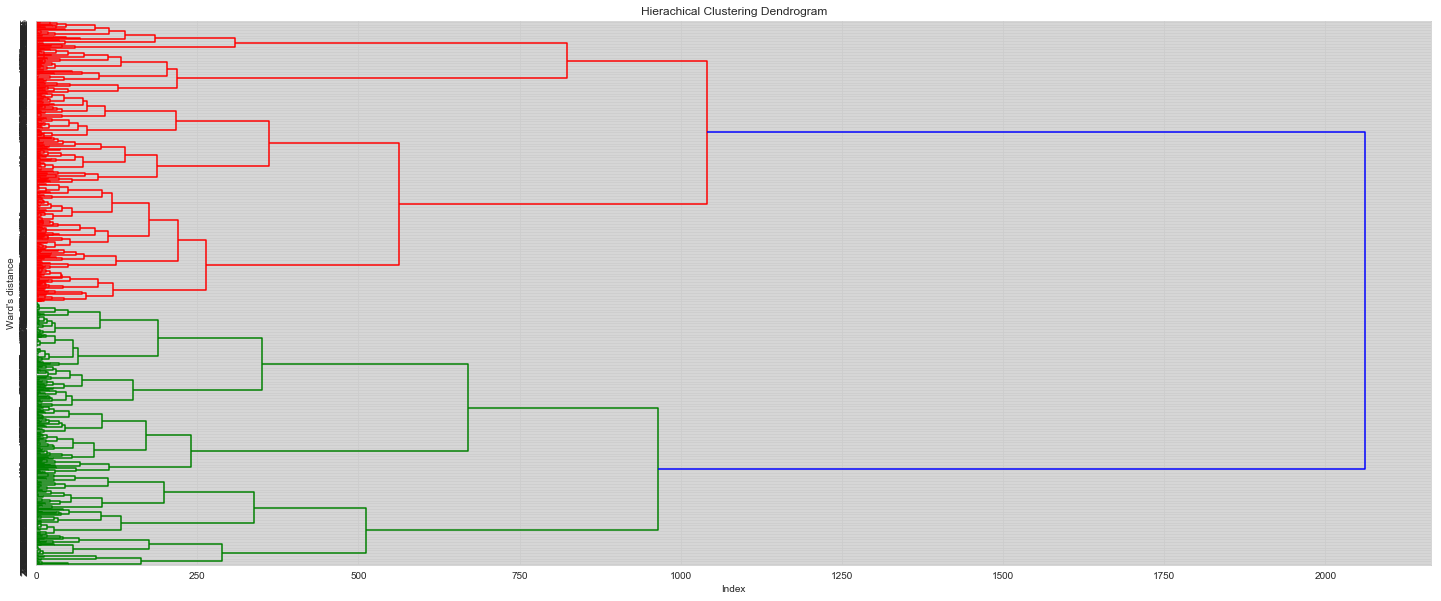

In [62]:
plt.figure(figsize=(25, 10))
plt.title('Hierachical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(distance, orientation ='right',
          leaf_rotation=90.,
          leaf_font_size=9.,);

### Display of Hierarchical Clustering Dendrogram - Truncated

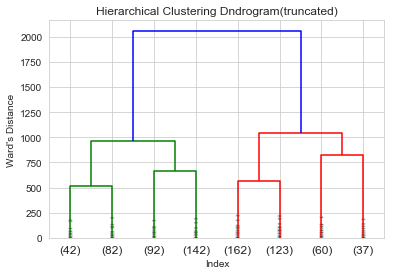

In [63]:
plt.title('Hierarchical Clustering Dndrogram(truncated)')
plt.xlabel('Index')
plt.ylabel("Ward's Distance")
dendrogram(distance, truncate_mode = 'lastp',
          p=8, leaf_rotation=0., leaf_font_size=12.,
          show_contracted=True);

### KMeans Clustering

In [64]:
from sklearn.cluster import KMeans

In [65]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
kmeans.inertia_

1103281.214394262

### Determining the Number of Clusters Required

In [67]:
sse_ =[]
for k in range (1, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])

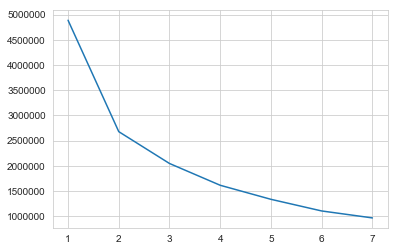

In [68]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [69]:
y_pred = kmeans.predict(X)

C:\Users\waqar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\waqar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\waqar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\waqar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


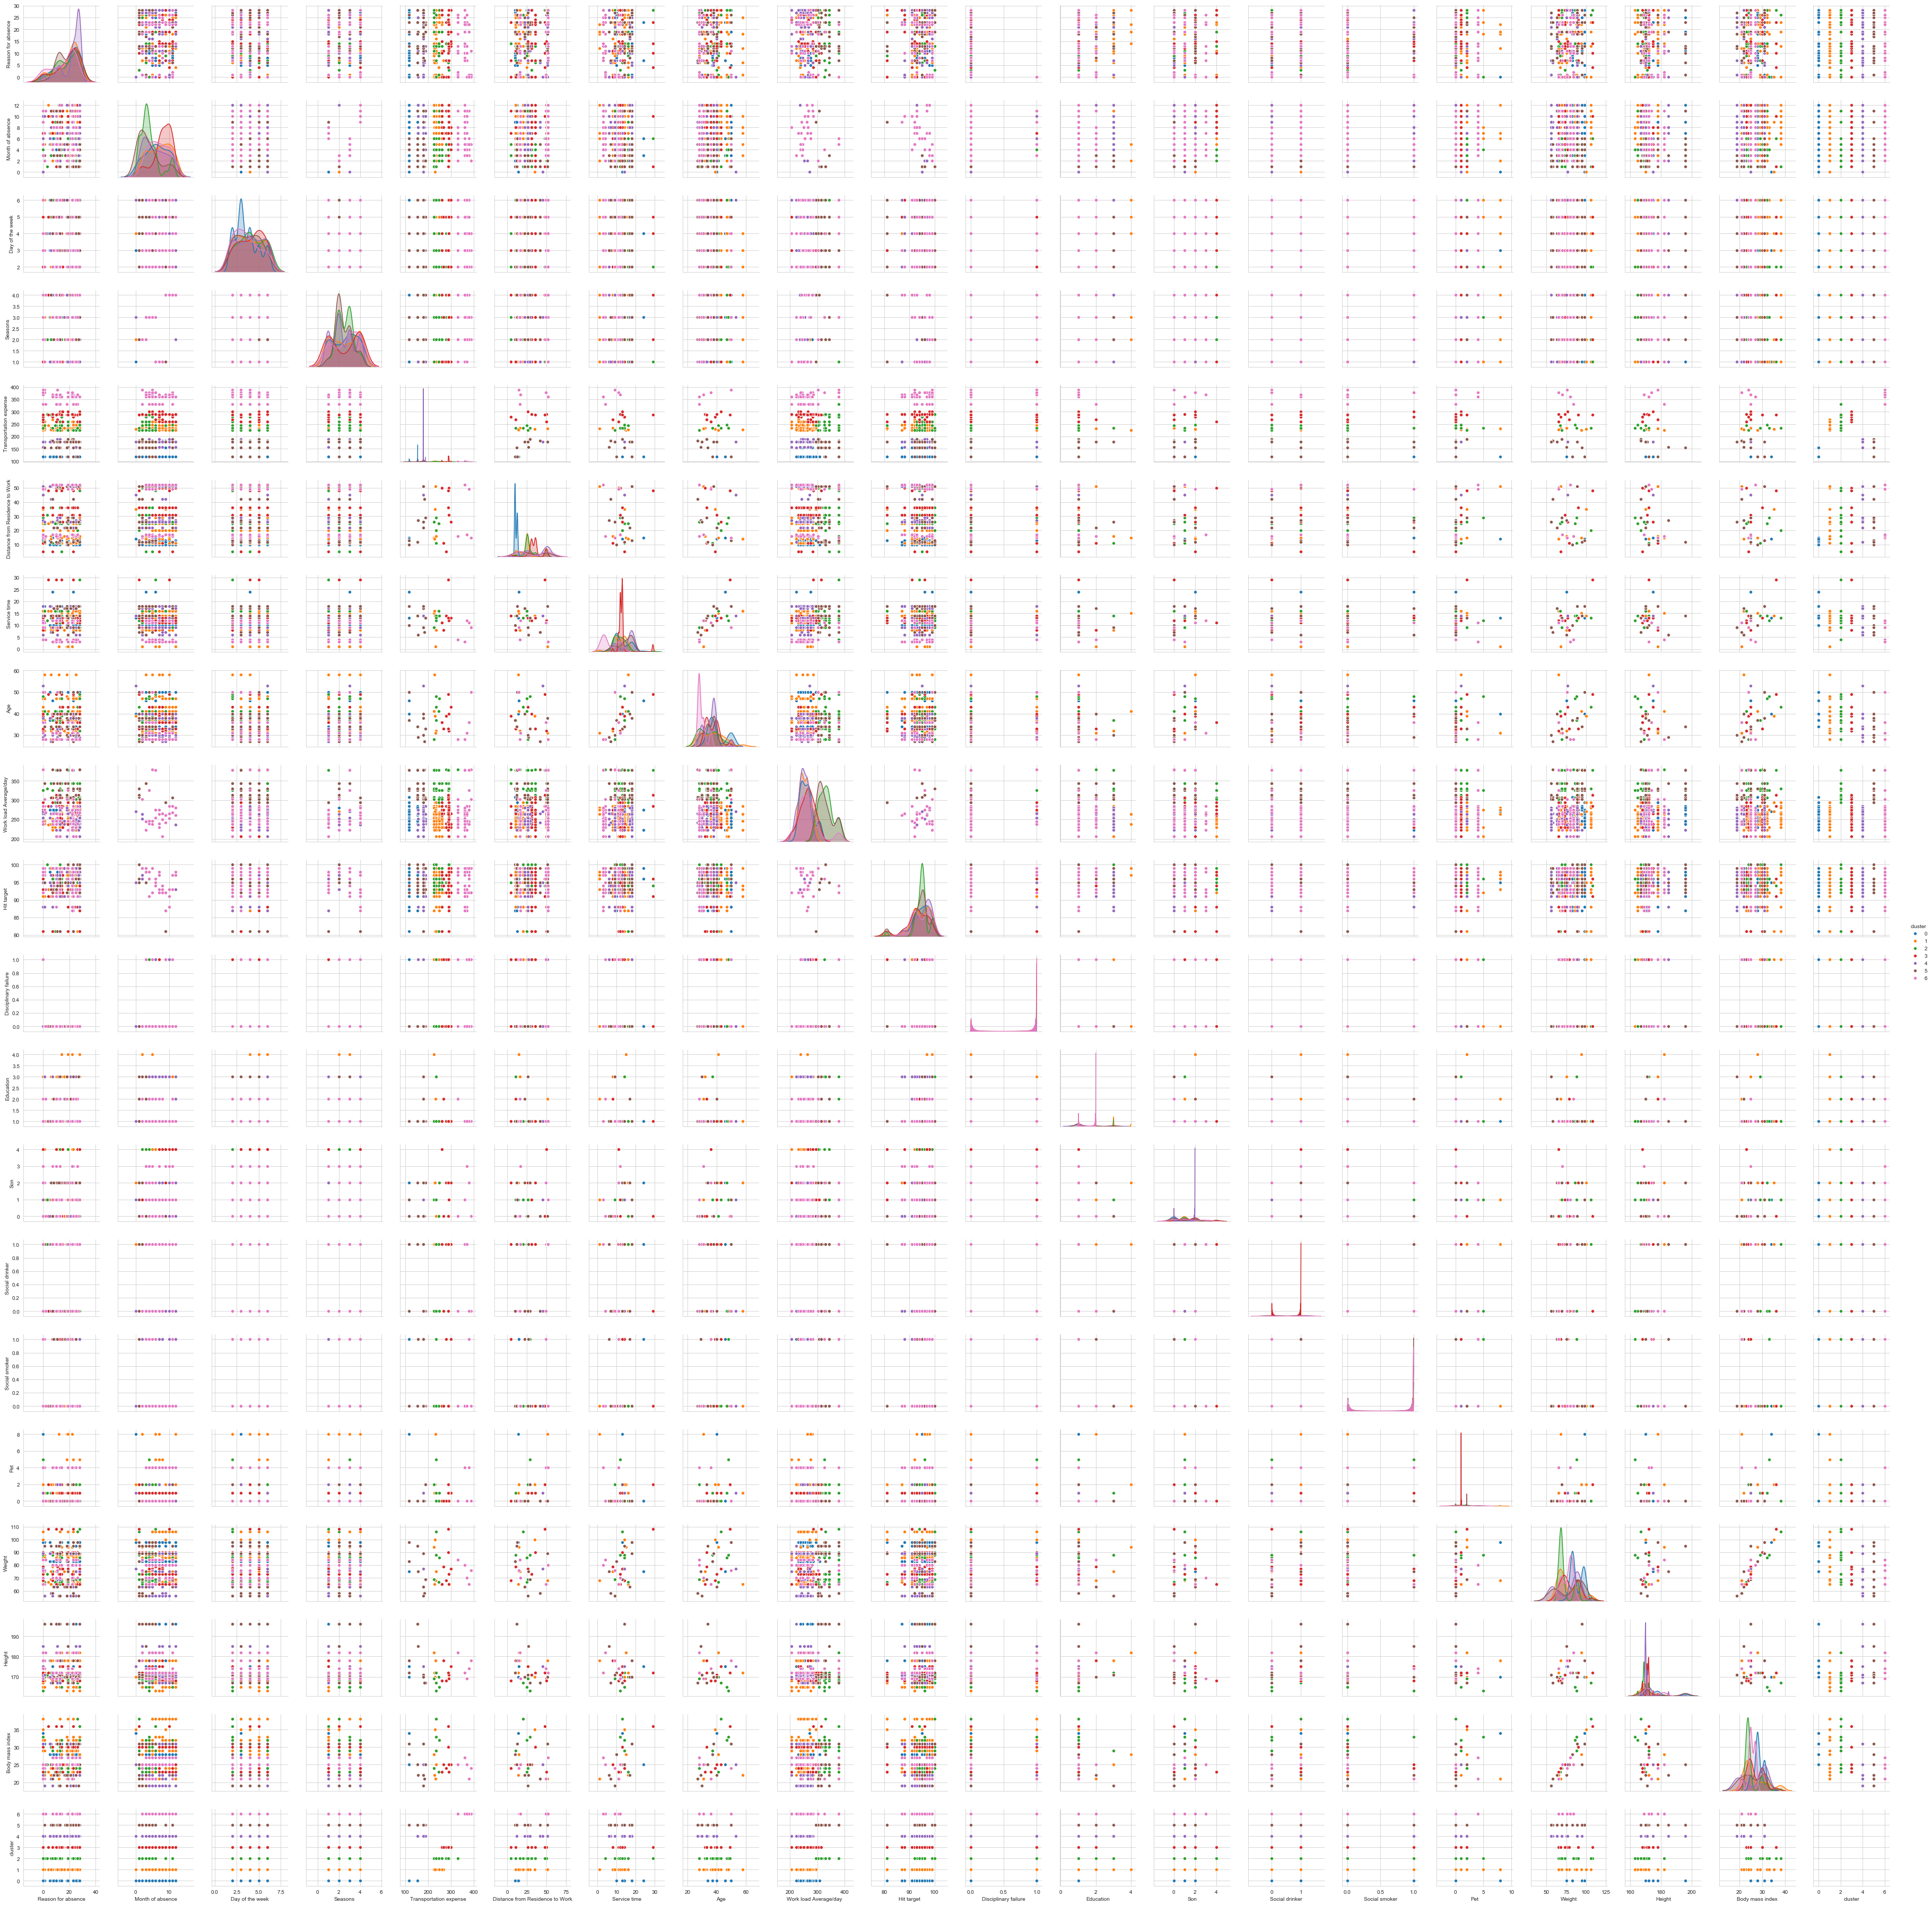

In [70]:
import seaborn as sns
df["cluster"] = y_pred
cols = list(df.columns)

sns.pairplot(df[ cols ], hue="cluster");

In [71]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'cluster'],
      dtype='object')

### Visualization with Reducted Number of Columns for Clarity

In [72]:
df1 = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense']]

C:\Users\waqar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\waqar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\waqar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\waqar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


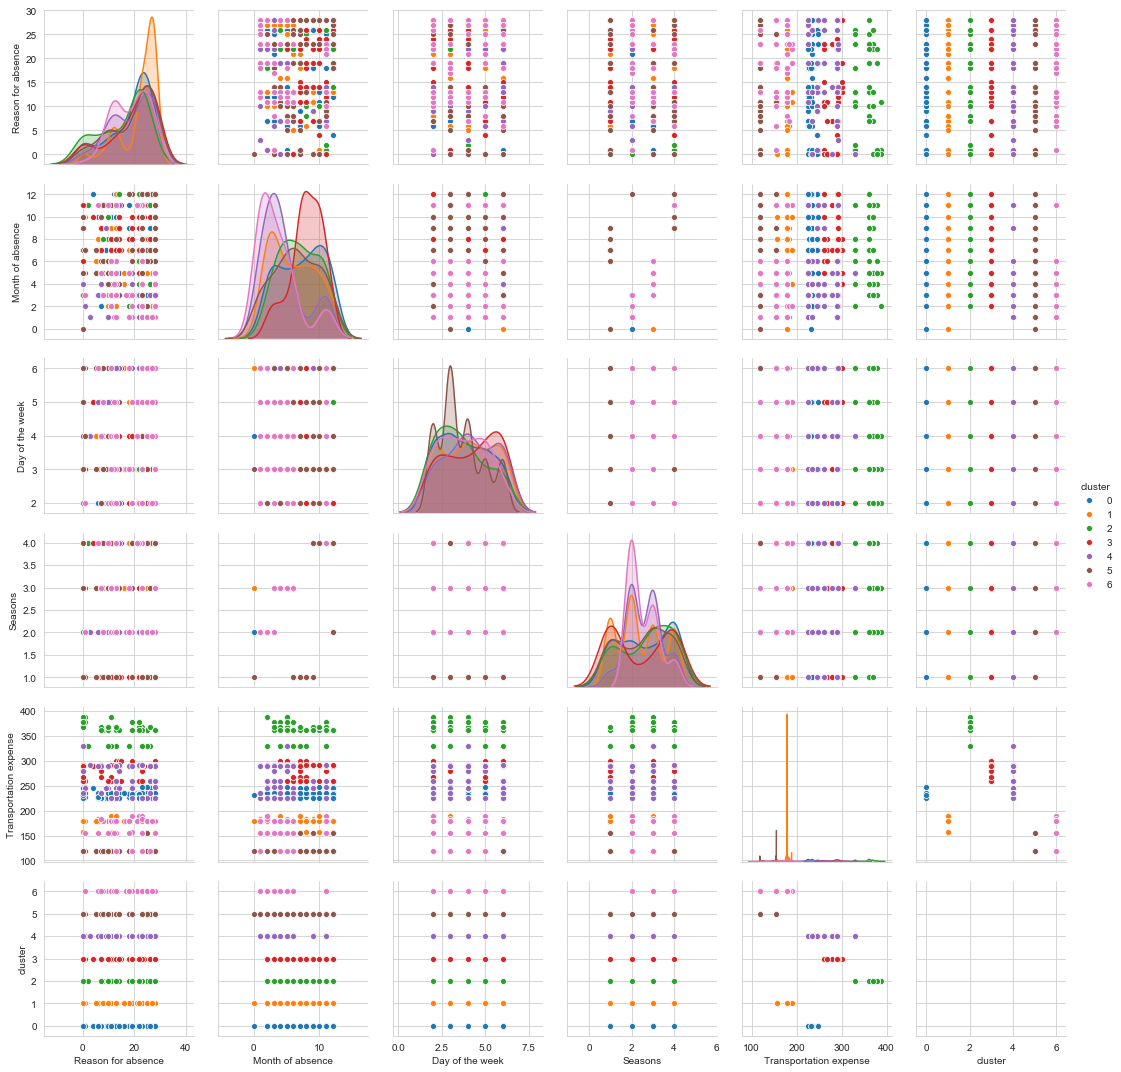

In [73]:
import seaborn as sns
df["cluster"] = y_pred
cols = list(df2.columns)

sns.pairplot( df2[ cols ], hue="cluster");